# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Note: "Extra" cells

Extra work over the minimum required for the project is indicated by cells tagged with an "Extra: ..." header

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from IPython.core.display import ( display, HTML )
from time import time

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
inline_rc = dict(mpl.rcParams)  # save orig. rc params

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Extra: Data verification
A few extra checks on the content of the data follow.

In [4]:
n_records      = data.shape[0]

# count num. missing across both dimensions of data
num_missing    = data.isnull().sum().sum()
num_data_items = data.shape[1]
num_entries    = n_records*num_data_items
pct_missing    = 100.0*(float(num_missing))/num_entries

# Print the results
print "Total number of records: {}".format(n_records)
print "%d data items for each record: (%s)\n" % (num_data_items, list(data))
print "%d=%f%% out of %d entries in input data are missing\n" % (num_missing,pct_missing,num_entries)

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#print(data[:n_records])
#print(data[:3])

Total number of records: 440
6 data items for each record: (['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'])

0=0.000000% out of 2640 entries in input data are missing



### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,22686,134,218,3157,9,548


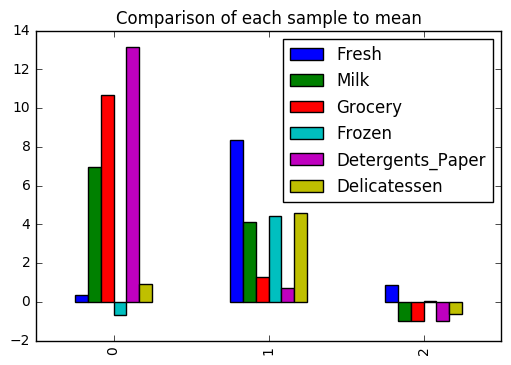

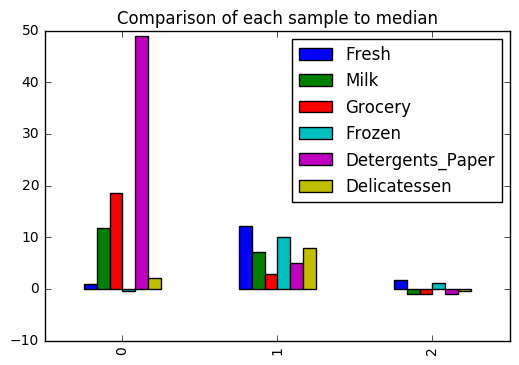

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 181, 356]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

benchmark = data.mean()
((samples-benchmark)/benchmark).plot.bar(title="Comparison of each sample to mean");

benchmark = data.median()
((samples-benchmark)/benchmark).plot.bar(title="Comparison of each sample to median");

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**  

Customer 0 (#85) is a **grocery warehouse** because it sells both the maximum amount of grocery items (9 standard deviations above the mean) as well as paper detergents (7 standard deviations above the mean) and a tiny amount of frozen foods.  

Customer 1 (#181) is a **supermarket** because it sells the maximum amount of fresh foods (8 standard deviations above the mean) and large amounts of all the other categories.  

Customer 2 (#356) is a **cafe.**  That's easy to tell because it has very small values for grocery items and paper detergents.  They also sell a large amount of fresh food (about one sd above the mean), an average amount of frozen food, and almost no milk (much less than the mean).  

### Extra: Pairwise correlations
To get some insight into interactions between features, the following code was added that prints pairwise corelations (matrix and top 10) between features.

,feature,skew,skew test p
0,Fresh,2.55258268791,9.9205556012e-41
1,Milk,4.03992212279,7.2698939324e-62
2,Grocery,3.57518722008,9.75586671045e-56
3,Frozen,5.88782572896,5.17831088293e-83
4,Detergents_Paper,3.61945757831,2.44675173162e-56
5,Delicatessen,11.1135336487,2.7072233455e-126


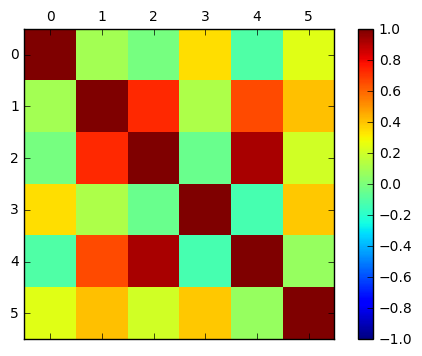

Note: dark colors indicate high correlation between a pair of features


Grocery  Detergents_Paper    0.924641
Milk     Grocery             0.728335
         Detergents_Paper    0.661816
         Delicatessen        0.406368
Frozen   Delicatessen        0.390947
Fresh    Frozen              0.345881
         Delicatessen        0.244690
Grocery  Delicatessen        0.205497
Milk     Frozen              0.123994
Fresh    Milk                0.100510
dtype: float64


Frozen            Detergents_Paper   -0.131525
Fresh             Detergents_Paper   -0.101953
Grocery           Frozen             -0.040193
Fresh             Grocery            -0.011854
Detergents_Paper  Delicatessen        0.069291
Fresh             Milk                0.100510
Milk              Frozen              0.123994
Grocery           Delicatessen        0.205497
Fresh             Delicatessen        0.244690
dtype: float64


In [6]:
import scipy.stats
#
#  Print skew and skewtest of data
#
def print_skew(data):
    cols    = list(data.columns)
    sk      = scipy.stats.skew(data)
    sktest  = scipy.stats.skewtest(data)[1]
    a       = np.array(zip(cols,sk,sktest))
    display(HTML("<h3>\"Skew\" of each feature, 0=normally distributed, >0=right skew</h3>"))
    display(HTML("<u>p value for 2-sided test of H0 that skew was dfrawn from a normal</u>"))
    skew_df = pd.DataFrame(a, columns=('feature', 'skew', 'skew test p'))
    display(skew_df)

def plot_and_print_topN(df, start, N):
    display(HTML('<h2>Extra: Correlation matrix for pairs of features</h2>'))
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    cax = ax.matshow(df, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.show()
    print "Note: dark colors indicate high correlation between a pair of features"
    # select and sort only the upper diagonal elements of the matrix
    keep        = np.triu(np.ones(df.shape)).astype('bool').reshape(df.size)
    new_df      = df.stack()[keep]
    sorted_vals = new_df.sort_values(ascending=False)
    
    display(HTML("\n<u>%s highly positive pairwise correlations</u>\n" % N))
    print(sorted_vals[ start : start+N]); # skip the correlations between features and themselves, they're always 1.0
    sorted_vals = new_df.sort_values(ascending=True)
    display(HTML("\n<u>%s highly negative pairwise correlations</u>\n" % N))
    print(sorted_vals[ 0 : N-1 ]);

print_skew( data )
plot_and_print_topN( data.corr(), len(data.columns), 10 )

# Refs.
# https://en.wikipedia.org/wiki/Skewness
# https://en.wikipedia.org/wiki/Log-normal_distribution
# http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.skew.html

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.
 
**Note:** Code was added that mitigates the effect of any particular choice for the random state by averaging the prediction scpre over 100 samples of the random state (from 0 to 99).

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import tree

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
detergents   = data['Detergents_Paper']
new_data     = data.drop('Detergents_Paper', axis = 1)

#
#  mitigate the effect of any particular choice for the random_state on the prediction score, 
#    average the score over the random states from 0 to 99.
#
score_sum      = 0.0
Nrandom_states = 100

for rs in range(Nrandom_states):
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, detergents, test_size = 0.25, random_state = rs)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor(random_state=rs)
    regressor = regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score_sum += regressor.score(X_test, y_test)
    
print "score=%f" % (score_sum / Nrandom_states)

score=0.686153


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**  I attempted to predict Detergents_Paper.  I mitigated the effect of any particular choice for random_state by averaging the prediction scores over 100 values (random_state = [0...99]).  The average score is 0.686 which means the other features are highly correlated with the value of Detergents_Paper and thus it's helpful but not completely necessary for identifying customers' spending habits.  

Note (from the grader): _this score is high, but probably not high enough for removal. However, if we ever need to drop a feature to make the dataset more managable, it would be a fit candidate - a feature that can be predicted, at least partly, from other features would only give us a marginal 'information gain.'_

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

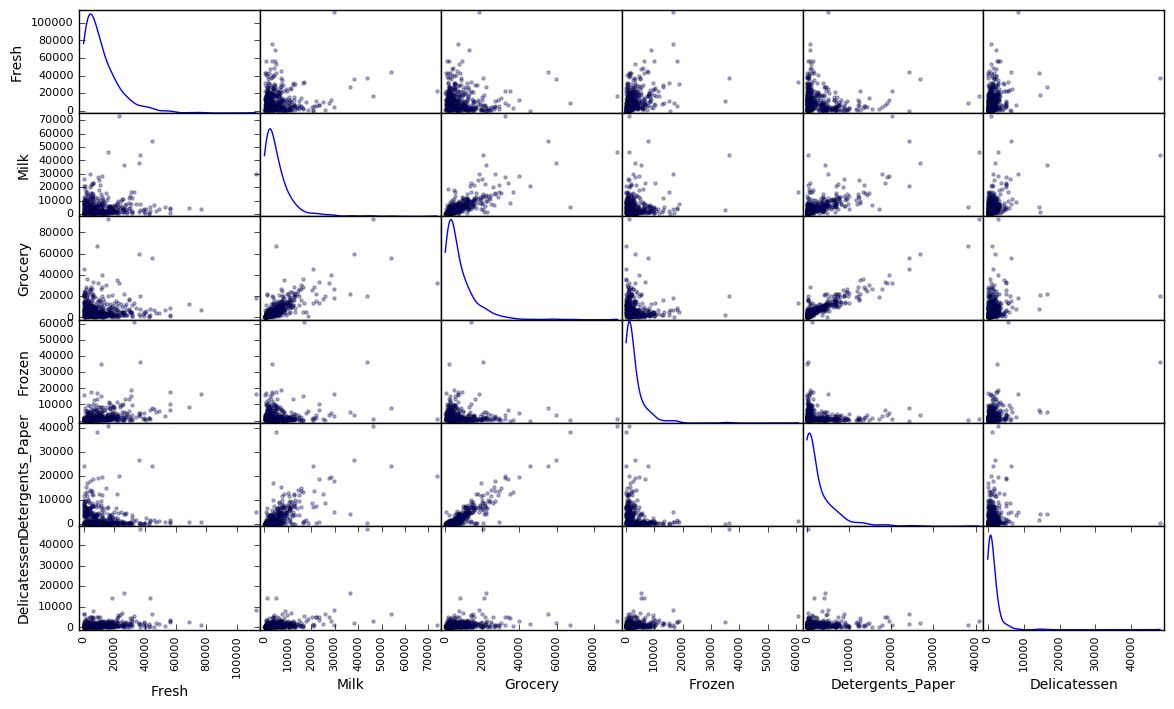

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**  There is a high degree of correlation between Grocery and Detergents_Paper as well as Milk:Grocery and Milk:Detergents_Paper.  This confirms my suspicion about the relevance of the feature I attempted to predict (Detergents_Paper).  The data for these pairs of features is obviously clustered along a line.

The individual distributions are not normal and are obviously highly right-skewed.

As pointed out by the grader, _the clustering algorithms discussed in this project work under the assumption that the data features are (roughly) normally distributed.  Significant deviation from zero skewness indicates that we must apply some kind of normalization to make the features normally distributed._

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

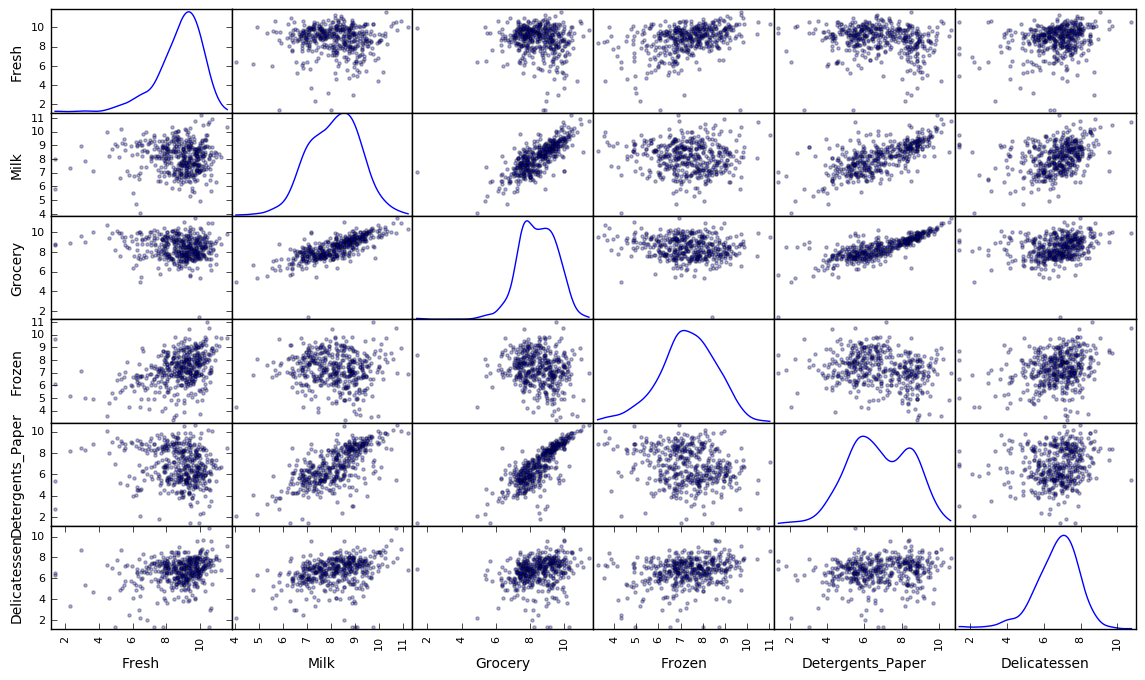

In [9]:
# TODO: Scale the data using the natural logarithm
# features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))
log_data    = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Note for future reference from the grader:
#  many algorithms rely on the assumption that data is unskewed like normal distribution. 
#  Scaling is one technique to make skewed data more symmetric. Besides using log 
#  transformation, other techniques include taking square root of the data, and more 
#  advanced ones like Box-Cox transformation: 
#  from scipy.stats import boxcox
#  x_boxcox, _ = boxcox(x)
# Ref: http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html

### Extra: Pairwise correlations after log transformation

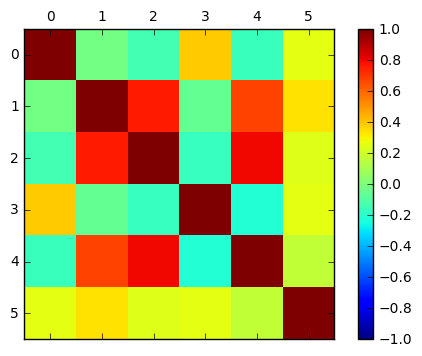

Note: dark colors indicate high correlation between a pair of features


Grocery           Detergents_Paper    0.797141
Milk              Grocery             0.761128
                  Detergents_Paper    0.678725
Fresh             Frozen              0.386258
Milk              Delicatessen        0.342310
Fresh             Delicatessen        0.256442
Frozen            Delicatessen        0.256318
Grocery           Delicatessen        0.239998
Detergents_Paper  Delicatessen        0.167573
Fresh             Milk               -0.021096
dtype: float64


Frozen            Detergents_Paper   -0.212771
Grocery           Frozen             -0.164525
Fresh             Detergents_Paper   -0.158706
                  Grocery            -0.132989
Milk              Frozen             -0.055229
Fresh             Milk               -0.021096
Detergents_Paper  Delicatessen        0.167573
Grocery           Delicatessen        0.239998
Frozen            Delicatessen        0.256318
dtype: float64


In [10]:
plot_and_print_topN( log_data.corr(), len(log_data.columns), 10 )

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

**Answer:** After the natural log was applied to the data, the major correlations are still present, in roughly the same order.  The Grocery:Detergents_Paper correlation is weaker and the Milk:Grocery and Milk:Detergents_Paper correlations are a bit stronger.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687692,10.740692,11.437997,6.934397,10.617123,7.987864
1,11.627610,10.296475,9.806371,9.725915,8.506941,9.053804
2,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# OPTIONAL: Select the indices for data points you wish to remove
outlier_cnts = [0] * len(log_data)      # number of features that flag each sample as an outlier
feature_nums = log_data.index.tolist()  # id numbers for each sample
#
# For each feature find the data points with extremely high or low values
#
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    # print "step(%s)=%f Q1=%f Q3=%f" % (feature,step, Q1, Q3)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    candidate_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(candidate_outliers)
    #  Count number of times each sample is flagged as an outlier, save counts in outlier_cnts[]
    outlier_ids        = candidate_outliers.index.tolist()
    for i in outlier_ids: outlier_cnts[i] += 1

    
# OPTIONAL: Select the indices for data points you wish to remove

display(HTML("<h3>Data points and number of features in which they are outliers</h3>"))
#
#  Select only data points that were chosen as outliers by more than one feature
#
real_outliers = [(i, outlier_cnts[i]) for i in feature_nums if outlier_cnts[i] > 1]
print("(data point id, num. times an outlier): %s" % real_outliers)
#
# add the ids of the outlier data points to outliers[]
#
outliers  = [pair[0] for pair in real_outliers]
#
# print the original data for the outliers so we can see why they were selected
#
display(HTML("<h3>Original data for each outlier -- these were removed from the data that was analyzed"))
print(data.ix[outliers])
#
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


(data point id, num. times an outlier): [(65, 2), (66, 2), (75, 2), (128, 2), (154, 3)]


     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
65      85  20959    45828      36             24231          1423
66       9   1534     7417     175              3468            27
75   20398   1137        3    4407                 3           975
128    140   8847     3823     142              1062             3
154    622     55      137      75                 7             8


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**  After applying Tukey's method and selecting only those data items that are flagged as outliers by at least two features, five data items are identified as potential outliers.  Inspection of the original data for each point shows that they are clearly on the extreme ends of at least one of the feature scales.  **65** has very close to the minimum values of both Fresh and Frozen.  **66** has very low Fresh, Frozen and Deli.  **75** has the overall minimum of both Frozen and Detergents_Paper.  **128** has the overall minimum Deli and very low Fresh and Frozen.  **154** has the overall lowest Milk and probably the second overall lowest Detergents_Paper and Deli.

Clearly, each potential outlier is way out on the fringe of our data set and because of the extraordinarily low values of one or more features, could easily have been the result of a measurement error.  If we had access to the original raw samples or the records that were gathered in the field, it would be a good idea to see whether these measurements really are valid.  However, since we don't have that information, based on the recommendations in [Karen], I decided to **run the subsequent analysis both with and without the outliers,** report both sets of results, and provide an explanation if any of them are dropped.  We'll assess the impact of including them (or not) on the variance of the data set, the PCA and the clustering algorithms.  

According to Karen, **outliers should be dropped** when it's obvious they were the result of incorrectly measured or entered data, they do not change the results but do affect the assumptions, or the outlier _creates_ a significant association.

**Outliers should not be dropped** when they affect both the results and assumptions.  Karen suggests that the analysis be run with and without the outliers and if some are later dropped, an explanation should be provided.

Karen, http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Variance explained by each PCA component:
[ 0.44374606  0.27667282  0.1150988   0.09589157  0.04573598  0.02285477]
Cumulative variance explained by each PCA component:
Dimension 1    0.4437
Dimension 2    0.7204
Dimension 3    0.8355
Dimension 4    0.9314
Dimension 5    0.9771
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


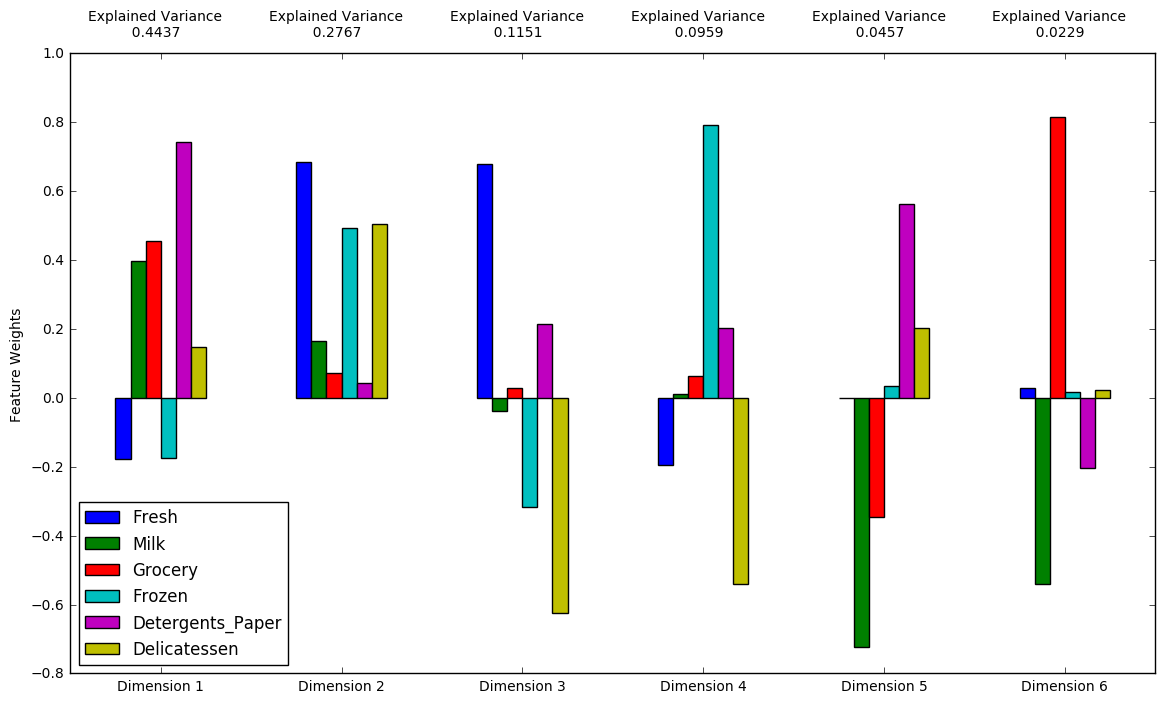

Variance explained by each PCA component:
[ 0.44465231  0.26384572  0.12185114  0.10073867  0.0483576   0.02055455]
Cumulative variance explained by each PCA component:
Dimension 1    0.4447
Dimension 2    0.7085
Dimension 3    0.8304
Dimension 4    0.9311
Dimension 5    0.9795
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


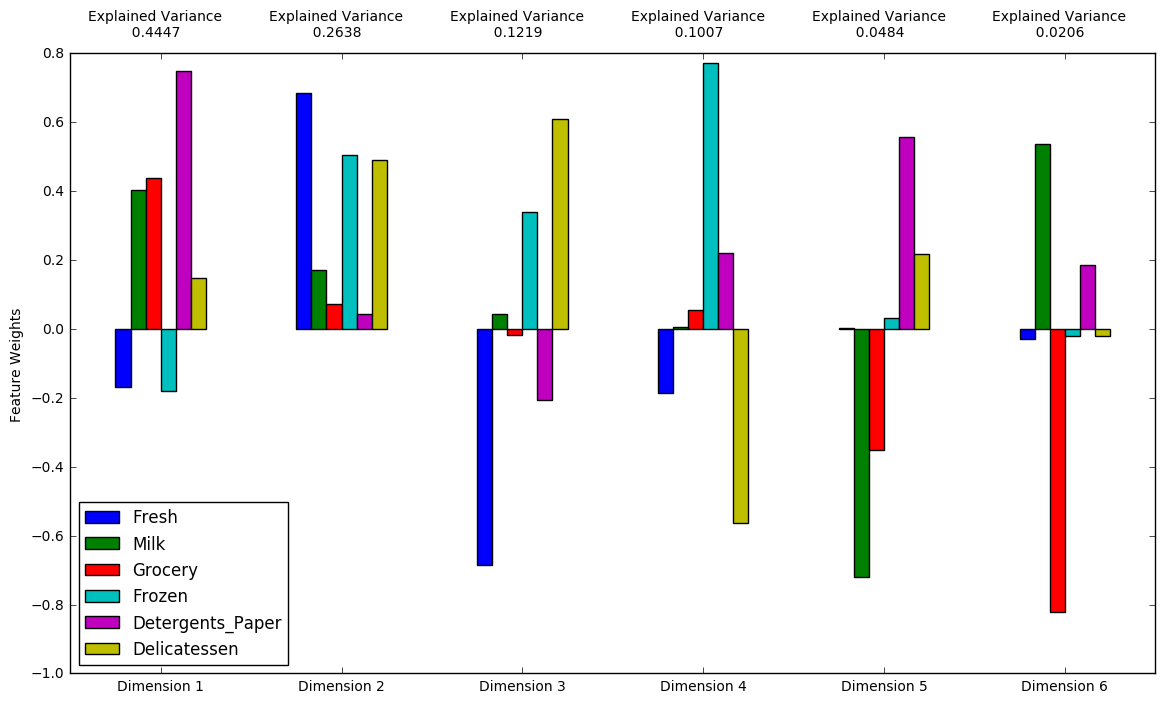

In [13]:
from sklearn.decomposition import PCA

def apply_pca( feature_data, title ):
    display(HTML("<h3>Six PCA Components Derived from %s" % title ))
    N_components = len(feature_data.columns)
    # TODO: Apply PCA by fitting the good data with the same number of dimensions as features
    pca = PCA(n_components=N_components)
    pca.fit( feature_data )
    print "Variance explained by each PCA component:"
    print pca.explained_variance_ratio_
    # print "total explained variance=%f" % sum(pca.explained_variance_ratio_)

    # TODO: Transform log_samples using the PCA fit above
    pca_samples = pca.transform(log_samples)

    # Generate PCA results plot
    pca_results = vs.pca_results(good_data, pca)

    print "Cumulative variance explained by each PCA component:"
    print pca_results['Explained Variance'].cumsum();
    plt.show()
    
    return( pca, pca_samples, pca_results )

_, _, _                       = apply_pca( log_data, "all data samples" )
pca, pca_samples, pca_results = apply_pca( good_data, "data samples minus outliers" )

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** 70.9% of the variance in the data is explained in total by the first and second principal components (in the data without outliers).  The first four principal components explain 93.1% of the variance in the data.  

The first dimension (principal component) increases with increasing spending on **detergents, milk and grocery** items.  This suggests that these criteria vary together and reinforce our earlier observation about the strong pairwise correlations between them.  High values on this dimension would likely **separate** retailers from other customers.

The second dimension (principal component) increases with increasing spending on **fresh food, frozen food and deli** items.  High values on this dimension would likely **separate** restaurants from other customers.

The third dimension (principal component) increases with increasing spending on **frozen food and deli** items and decreasing spending on **fresh food.**

The fourth dimension (principal component) strongly increases with increasing spending on **frozen food** and decreasing spending on **deli** items.

It's fascinating to see the effect of outliers on the PCA dimensions.  The first two dimensions appear quite similar.  It looks like the sign of all the features in the third dimension flips but their magnitude remains the same.  The fourth and fifth dimensions appear to be the same.  The signs of all the features in the sixth dimension flips and their magnitudes remain the same.  

**Refs.**

https://onlinecourses.science.psu.edu/stat505/node/54

http://setosa.io/ev/principal-component-analysis/

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

**Answer:** Yes, the pca_samples are consistent with our earlier observations.  Customer 0 (the grocery warehouse) spent a lot on grocery and detergents and this is reflected in high values on dimensions 1 and 2.  Customer 1 (the supermarket) spent a lot on fresh foods as well as other categories.  This is entirely consistent with a high value on dimension 2 and a lower value on dimension 1.  Customer 2 (the cafe) did not spend much on grocery, detergents, and milk and this is consistent with the large negative value for dimension 1.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3258,1.8893,-0.7043,-0.1863,-0.5288,-0.3767
1,2.1791,4.8635,0.0138,0.4510,-0.4894,0.2011
2,-6.4245,0.0734,-0.0072,-0.6242,0.8298,-0.0881


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
def reduce_two_dimensions( feature_data, samples ):
    # TODO: Apply PCA by fitting the good data with only two dimensions
    pca = PCA( n_components=2 )
    pca = pca.fit( feature_data )

    # TODO: Transform the good data using the PCA fit above
    reduced_data =  pca.transform( feature_data )

    # TODO: Transform log_samples using the PCA fit above
    pca_samples = pca.transform( samples )

    # Create a DataFrame for the reduced data
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
    
    return( pca, reduced_data, pca_samples )

pca_full, reduced_data_full, pca_samples_full = reduce_two_dimensions( log_data,  log_samples )
pca_good, reduced_data_good, pca_samples_good = reduce_two_dimensions( good_data, log_samples )

### Extra: from Grader in second review

The grader suggested: "It is also interesting to visualize the data distribution after dimension reduction."  and supplied the following code.

So, I implemented this and obtained the following plots.

The grader further said: "For dimension 1, you can observe that it has a bi-modal distribution that looks very similar in shape to the Milk, Grocery, and Detergents_Paper distributions after log transformation. This is consistent with the significant features in the first principal component in Question 5."

Indeed, if you go back and look at the scatterplot after the log transformation you can see that the distributions of the milk, grocery, and detergent_paper features are indeed bimodal.  Those features have been combined into the first principal component by PCA and we see the same bimodal characteristic in the following plot.  **Fascinating!!**

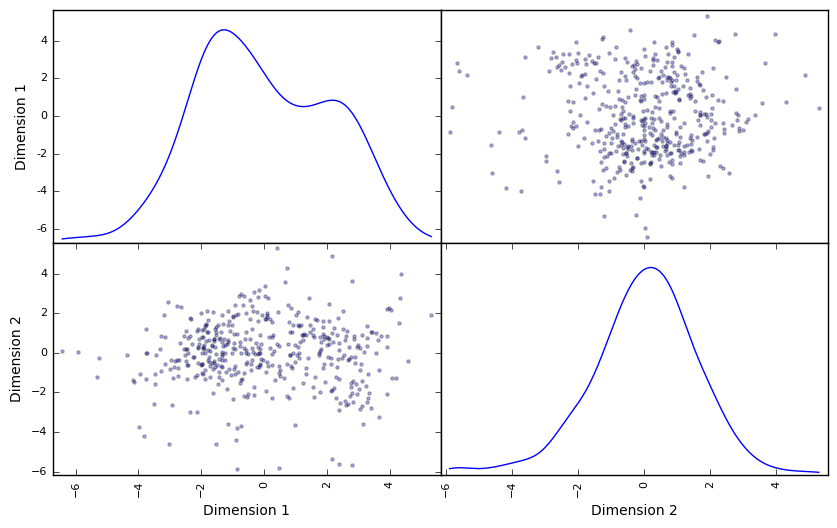

In [16]:
pd.scatter_matrix(reduced_data_good, alpha = 0.3, figsize = (10,6), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples_good, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.3258,1.8893
1,2.1791,4.8635
2,-6.4245,0.0734


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

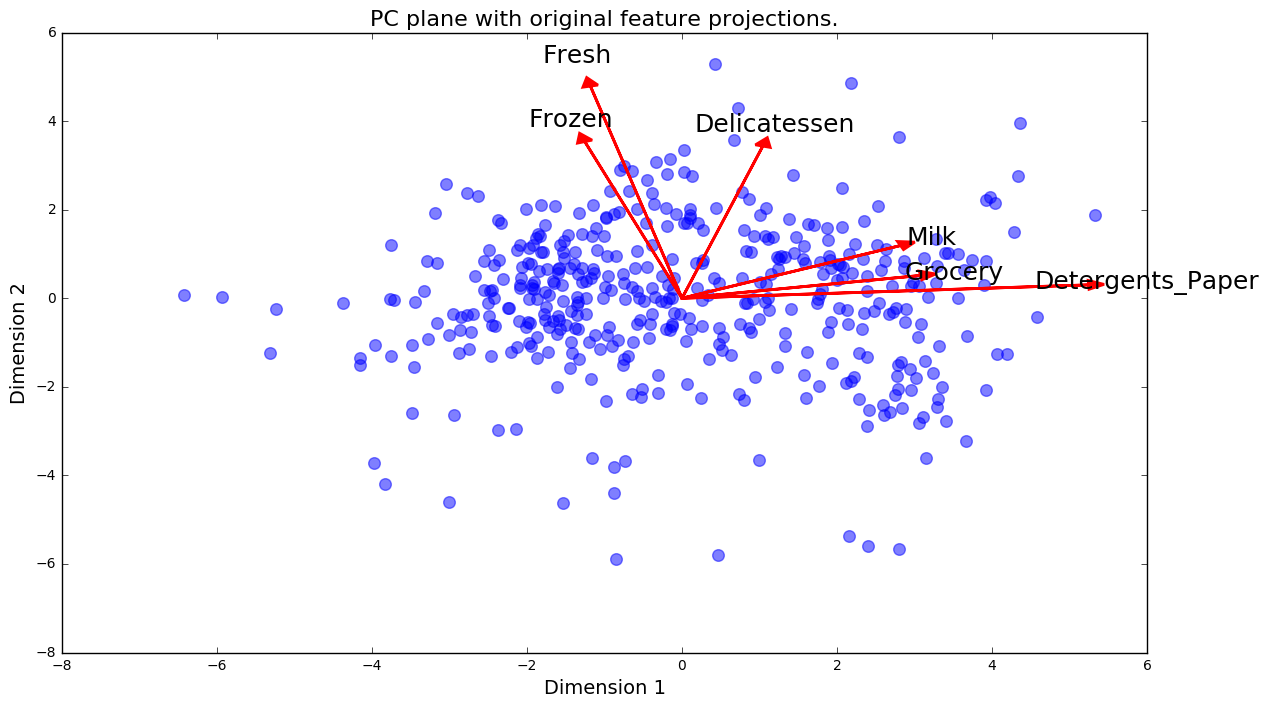

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data_good, pca_good);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:** From the biplot, Milk, Grocery, and Detergents_paper are strongly correlated with the first component and Frozen, Fresh and Deli are more strongly associated with the second component.  These observations agree with the pca_results plot that was obtained earlier.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The advantages of using a K-Means clustering algorithm includes its simplicity and the fact that it finds clusters that are grouped by Euclidean distance in feature space and thus can be easily understood.  That is, if we can see obvious clusters on a scatter plot, K-Means should be able to find them.  But if the clusters are defined by non-circular shapes or overlap one another, K-Means will have difficulty finding them.  

Another important consideration when deciding whether to use KMeans or GMM is that KMeans is often faster than GMM.  In the present case, that's not a significant concern because the data set is rather small and scalability is not an issue.  However, as pointed out by the grader, when data set size is a concern, we could use KMeans as a preliminary step and if we think the results could be improved, use GMM in the next step, while using KMeans' cluster centers to initialize GMM. 

The advantages of using a Gaussian Mixture Model (GMM) clustering algorithm include the fact that points are assigned to clusters with "soft" probabilities that express the likelihood that eeach point belongs to each cluster.  Also, GMM can model overlapping or irregularly-shaped clusters.

Based on my observations of the wholesale customer data, including the scatter plot that shows no obvious clusters in feature space (this argues against K-Means), I would **recommend using GMM** if we had to choose only one clustering algorithm.

However, since the clustering algorithms are easily available, and their run times on the present data set are negligible, I used both K-Means and GMM for the rest of the analysis.

Note from grader: _Intuitively, K-Means assumes that the clusters of data are contained spheres. On the other hand, GMM assumes the clustered data are elliptical, thus is more flexible. We can also consider GMM as a generalization of k-means clustering by accounting for the covariance and centres of the latent Gaussian._

Ref. https://www.youtube.com/watch?v=qMTuMa86NzU (this is an outstanding presentation about GMM and how it differs from K-Means.)

Refs. from grader (thanks much!)
http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html
http://www.nickgillian.com/wiki/pmwiki.php/GRT/GMMClassifier
http://playwidtech.blogspot.hk/2013/02/k-means-clustering-advantages-and.html
http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm
http://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means
http://www.r-bloggers.com/k-means-clustering-is-not-a-free-lunch/
http://www.r-bloggers.com/pca-and-k-means-clustering-of-delta-aircraft/
https://shapeofdata.wordpress.com/2013/07/30/k-means/
http://mlg.eng.cam.ac.uk/tutorials/06/cb.pdf
https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [27]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
#
#  apply_clusterer( clustering_algorithm, reduced_data, num_clusters, pca_samples ) 
#      compute and return the centers of the reduced data as well as the silhouette score for 
#  the given clustering algorithm
#
#   Note: BIC score is Bayesian information coefficient.  The lower the better.
#      It's a measure of the goodness of a clustering provided by GMM.
#      The grader suggested I check it out.
#
def apply_clusterer( algorithm, reduced_data, N_clusters, pca_samples ):
    name      = algorithm.__name__
    bic_score = None
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    start_time=time()
    if (algorithm == KMeans):
        sil_score_metric = 'euclidean'
        clusterer = algorithm(n_clusters=N_clusters, random_state=0).fit(reduced_data)
    else:
        sil_score_metric = 'mahalanobis'
        #sil_score_metric = 'euclidean'
        clusterer = algorithm(n_components=N_clusters, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    #print(reduced_data)
    preds = clusterer.predict(reduced_data)
    end_time = time()

    # TODO: Find the cluster centers
    if (algorithm == KMeans):
        centers = clusterer.cluster_centers_
    else:
        centers   = clusterer.means_
        bic_score = clusterer.bic(reduced_data)
        
    print "%s with %d clusters finds the following centers in %f seconds:" % ( name, N_clusters, (end_time-start_time) )
    print(centers)
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict( pca_samples )
    
    sil_score = silhouette_score( reduced_data, preds, metric=sil_score_metric )

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    return( centers, preds, sil_score, sil_score_metric, bic_score, sample_preds )

def cluster_with_data_set( feature_data, pca_samples, data_set_name ):
    display(HTML("<h3>Clustering with Kmeans and Gaussian Mixture Model (GMM) and data=%s</h3>" % data_set_name))
    for clustering_algorithm in ( KMeans, GMM ):
        #name = clustering_algorithm.__name__
        for num_clusters in ( 2, 3, 4, 5 ):
            # print "%s with %d clusters finds the following centers:" % ( name, num_clusters )
            _, _, sil_score, metric, bic_score, _ = apply_clusterer( clustering_algorithm, feature_data, num_clusters, pca_samples );
            print "......... and silhouette_score=%0.4f with metric %s" % (sil_score, metric)
            if (bic_score):
                print "..............bic_score=%0.4f" % (bic_score)
            print "======================="

cluster_with_data_set( reduced_data_full, pca_samples_full, "all samples" )
cluster_with_data_set( reduced_data_good, pca_samples_good, "outliers removed" )
        

KMeans with 2 clusters finds the following centers in 0.128000 seconds:
[[ 2.2200685  -0.23787526]
 [-1.49411454  0.16009095]]
......... and silhouette_score=0.4205 with metric euclidean
KMeans with 3 clusters finds the following centers in 0.388000 seconds:
[[ 1.5866236   1.23079772]
 [-1.77102386 -0.03284716]
 [ 2.03205469 -2.27020771]]
......... and silhouette_score=0.3944 with metric euclidean
KMeans with 4 clusters finds the following centers in 0.368000 seconds:
[[ 2.08552895 -2.47888832]
 [-0.84420035  1.11347541]
 [-2.30216927 -0.85832388]
 [ 2.21219304  0.79577414]]
......... and silhouette_score=0.3300 with metric euclidean
KMeans with 5 clusters finds the following centers in 0.376000 seconds:
[[-1.12773844  1.48576827]
 [ 2.50315097 -2.48027862]
 [ 2.21547958  0.87717036]
 [-0.75730727 -0.7534306 ]
 [-3.35304011 -0.88421317]]
......... and silhouette_score=0.3502 with metric euclidean
GMM with 2 clusters finds the following centers in 0.194000 seconds:
[[ 1.06401902 -0.4136

KMeans with 2 clusters finds the following centers in 0.117000 seconds:
[[-1.48832998  0.10435916]
 [ 2.16943014 -0.15211674]]
......... and silhouette_score=0.4269 with metric euclidean
KMeans with 3 clusters finds the following centers in 0.217000 seconds:
[[ 1.97159705 -1.93518985]
 [-1.73469951 -0.05494173]
 [ 1.54559212  1.3161086 ]]
......... and silhouette_score=0.3939 with metric euclidean
KMeans with 4 clusters finds the following centers in 0.357000 seconds:
[[ 2.11366424 -2.07677991]
 [-2.06628459 -0.90120103]
 [-0.87855181  1.19573491]
 [ 2.22816894  0.84529192]]
......... and silhouette_score=0.3317 with metric euclidean
KMeans with 5 clusters finds the following centers in 0.298000 seconds:
[[-0.34146197 -0.85973291]
 [-2.63264556 -0.54455681]
 [-0.97410758  1.6165648 ]
 [ 2.55487299 -2.39104361]
 [ 2.30105088  0.85156532]]
......... and silhouette_score=0.3516 with metric euclidean
GMM with 2 clusters finds the following centers in 0.199000 seconds:
[[-1.32349592  0.1308

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  I implemented both KMeans and the Gaussian Mixture Model clustering algorithms, with and without outliers, and tried them for a number of clusters from 2 to 5.  Based on advice from the grader, I used the Euclidean distance metric for KMeans and the Mahalanobis distance metric for GMM.  The centers of the clusters calculated by each algorithm and their silhouette coefficients are shown above.

The results show that **KMeans** clustering with two clusters on the data set without outliers produces the maximum (or best) SIL score (0.4269).  The second best score is KMeans with two clusters (0.4205) on the complete data set (outliers included). This is the "best" score because, as described on sklearn's man page for the silhouette coefficient, "The best value is 1 and the worst value is -1.  Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."

It's interesting to see the effect of including outliers on clustering performance.  KMeans with two or three clusters produces better silhouette scores than KMeans with three clusters on the data set without outliers.   

Also, we see that **GMM** using the Mahalanobis distance on the complete data set (including outliers) produces a better silhouette score for three clusters than two.

**Note:** I wanted to try the BIC metric to evaluate the clusters returned by GMM, as it was suggested by the grader, but unfortunately I couldn't find documentation for it in sklearn.  The BIC (Bayes information criterion) that's described in wikipedia does not look like any of the cluster evaluation metrics I found in sklearn.

In conclusion, we get the **best silhouette score for two clusters** with KMeans with or without outliers.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

**Observation:**
The final visualization is shown below for the optimal algorithm (Kmeans) and number of clusters (two) on the data set with outliers removed.  The plot of Gaussian Mixture Model (GMM) results for two clusters is also shown so we can compare the results.  Intuitively, the Kmeans results look cleaner.  There is a separation between classes that clearly shows up on the chart.  The GMM results are not as visually appealing, but as we discussed earlier, clusters can overlap in feature space and there might not be a clear visual separation between them on a scatterplot.

The plot for GMM with five clusters is also provided to show that the results can get really wacky if the number of clusters is not carefully chosen.  

KMeans with 2 clusters finds the following centers in 0.121000 seconds:
[[-1.48832998  0.10435916]
 [ 2.16943014 -0.15211674]]


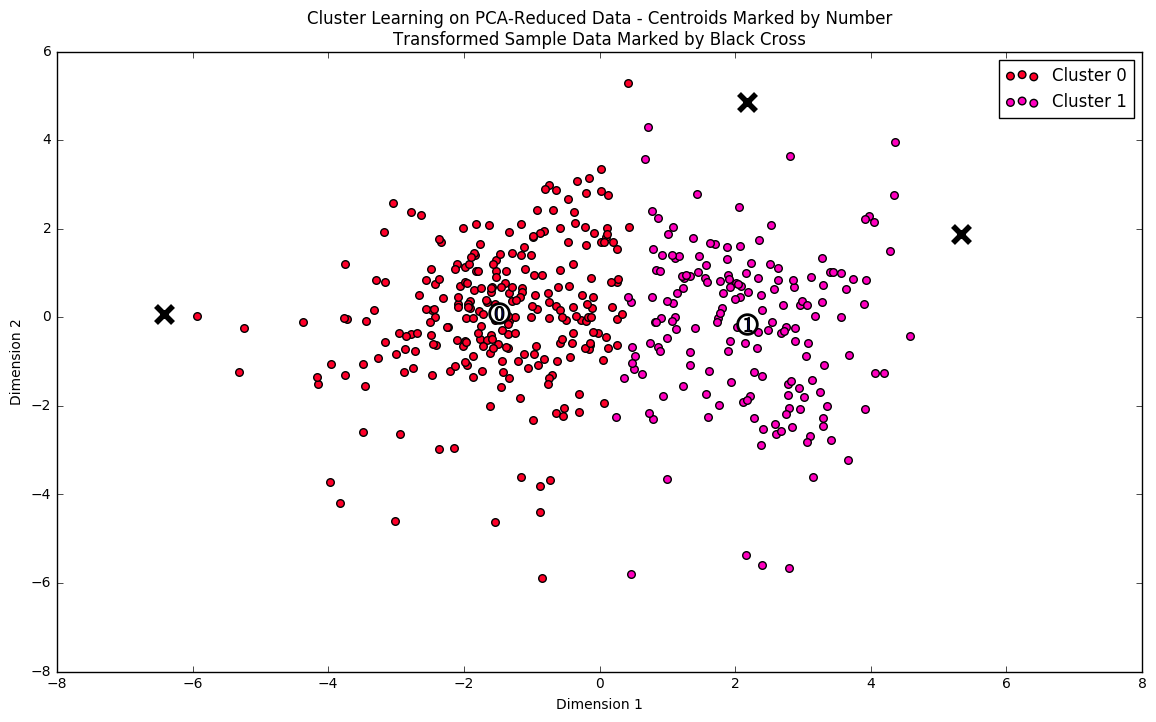

GMM with 2 clusters finds the following centers in 0.362000 seconds:
[[-1.32349592  0.13089129]
 [ 1.65343376 -0.16352153]]


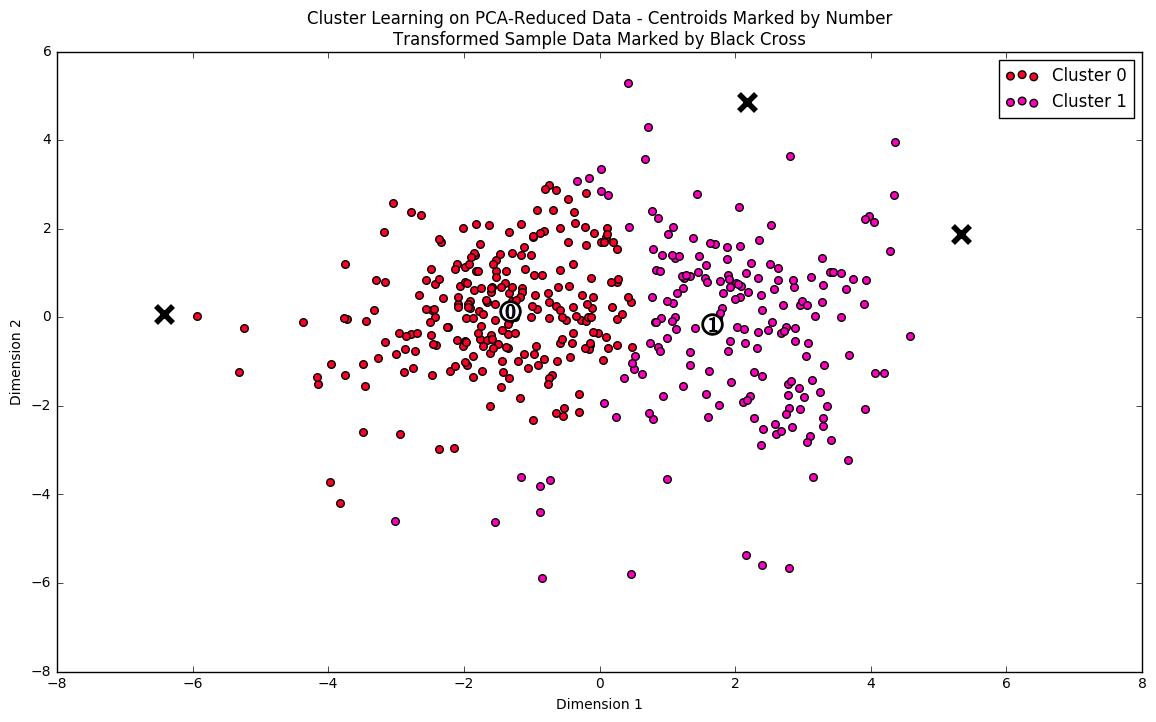

GMM with 5 clusters finds the following centers in 0.504000 seconds:
[[-1.30492571 -0.99365151]
 [-1.7017063  -0.02401303]
 [-0.56635355  0.99675433]
 [ 2.74735998 -1.19501342]
 [ 1.86272061  0.50975821]]


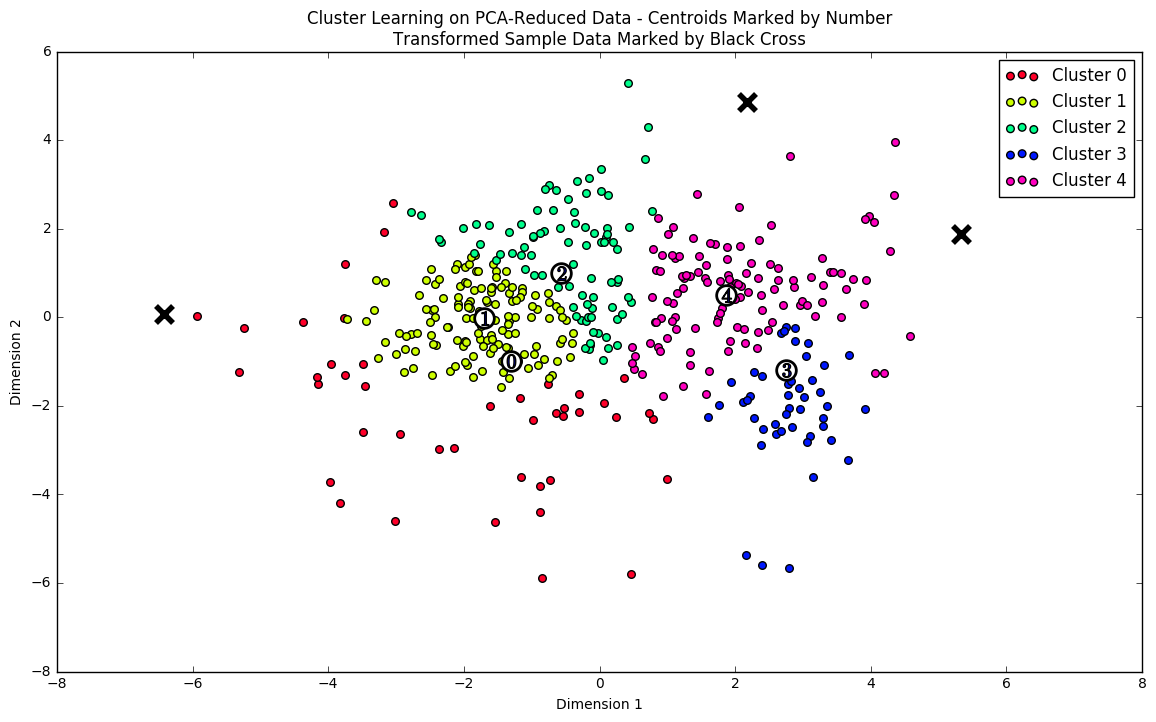

In [30]:
def display_clusters( clustering_algorithm, reduced_data, num_clusters, pca_samples ):
    name = clustering_algorithm.__name__
    centers, preds, sil, _, _, _ = apply_clusterer( clustering_algorithm, reduced_data, num_clusters, pca_samples )
    display(HTML("<h3>Results of %s with %d clusters and SIL score = %f</h3>" % (name, num_clusters, sil)))
    # Display the results of the clustering from implementation
    vs.cluster_results( reduced_data, preds, centers, pca_samples )
    plt.show()

display_clusters( KMeans, reduced_data_good, 2, pca_samples_good )
display_clusters( GMM,    reduced_data_good, 2, pca_samples_good )
display_clusters( GMM,    reduced_data_good, 5, pca_samples_good )

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [31]:
##
#  recover the centers calculated by the K-Means(n_clusters=2) and GMM(n_clusters=2) algorithms
#

def recover_centers( pca, centers ):
    
    # TODO: Inverse transform the centers
    log_centers = pca.inverse_transform( centers )
    #print(log_centers)

    # TODO: Exponentiate the centers
    true_centers = [np.exp(x) for x in [l for l in log_centers]]
    # print(true_centers)

    # Display the true centers
    segments           = ['Segment {}'.format(i) for i in range(0,len(centers))]
    true_centers       = pd.DataFrame(np.round(true_centers), columns = data.keys())
    true_centers.index = segments
    display(true_centers)

display(HTML("<h3>Results of KMeans and GMM: note similarity of cluster centers and values within segments</h3>"))

centers, _, _, _, _, _ = apply_clusterer( KMeans, reduced_data_good, 2, pca_samples_good )
recover_centers( pca_good, centers )

centers, _, _, _, _, _ = apply_clusterer( GMM, reduced_data_good, 2, pca_samples_good )
recover_centers( pca_good, centers )

KMeans with 2 clusters finds the following centers in 0.128000 seconds:
[[-1.48832998  0.10435916]
 [ 2.16943014 -0.15211674]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8878.0,1895.0,2475.0,2091.0,297.0,685.0
Segment 1,4017.0,7917.0,12127.0,954.0,4552.0,1041.0


GMM with 2 clusters finds the following centers in 0.192000 seconds:
[[-1.32349592  0.13089129]
 [ 1.65343376 -0.16352153]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8792.0,2035.0,2666.0,2058.0,336.0,711.0
Segment 1,4349.0,6419.0,9657.0,1040.0,3091.0,958.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  

According to the statistical description of the data set at the beginning of the project, it contains two categories of customer: 1. hotel, restaurant, or cafe and 2. retail.  Also, the statistics of each item are provided.

Segment 0 represents the **hotel, restaurant and cafe** category because it contains about the median amount of fresh foods, above the median in frozen, lower than average amount of milk, about 25th percentile grocery, a tiny amount of detergents_paper (25th percentile), and about the 35th percentile in deli items.  

Segment 1 represents the **retail** category because it contains the 25th percentile amount of fresh and frozen food and  high amounts of milk (75th percentile), grocery (75th percentile), detergents (75th percentile) and deli items (median).  These are products that people typically purchase in a retail establishment, as compared to hotels, restaurants, or cafes.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
def predict_category( clustering_algorithm, reduced_data, pca_samples ):
    _, _, _, _, _, sample_preds = apply_clusterer( clustering_algorithm, reduced_data, 2, pca_samples )

    # Display the predictions
    for i, pred in enumerate( sample_preds ):
        print "Sample point", i, "predicted to be in Cluster", pred
    
predict_category( KMeans, reduced_data_good, pca_samples_good )
predict_category( GMM,    reduced_data_good, pca_samples_good )

KMeans with 2 clusters finds the following centers in 0.212000 seconds:
[[-1.48832998  0.10435916]
 [ 2.16943014 -0.15211674]]
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
GMM with 2 clusters finds the following centers in 0.174000 seconds:
[[-1.32349592  0.13089129]
 [ 1.65343376 -0.16352153]]
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** 

When we compare **sample point 0** to the cluster centers shown above, we see that it is closer to **segment 1** (the retail category) because it has low fresh, huge amounts of milk and grocery items, close to the center in frozen, and huge amounts of detergent_paper and deli.

When we compare **sample point 1** to the cluster centers shown above, we see that it is closer to **segment 1** (the retail category) because it has a large amount of milk, close to the center's amount of grocery and detergents_paper and a huge amount of deli items.  This sample has an extraordinarily large amount of fresh and frozen items but it's not unusual for these items to be sold in a retail establishment.

When we compare **sample point 2** to the cluster centers shown above, we see that it is closer to **segment 0** (hotel, restaurant, cafe) because it contains a large amount of fresh, a tiny amount of milk and grocery, close to the cluster center's value for frozen, almost no detergent_paper, and close to the cluster center's amount of deli.

These hypotheses were confirmed (agreeing with my intuition) by applying the predict function of both the KMeans and GMM clustering algorithms (which returned the same results) to them.  Sample point 0 (the grocery warehouse) and sample point 1 (the supermarket) were correctly assigned to cluster 1 (the retail category).  Sample point 2 (the cafe) was correctly assigned to cluster 0 (the hotel, restaurant, and cafe category).

Yes, the predictions for each sample point are consistent with the customer segments from Question 8.

Furthermore, the above observations are consistent with the conjectures made in question #1 where we supposed that Customer 0 (#85) is a grocery warehouse because it sells both the maximum amount of grocery items (9 standard deviations above the mean) as well as paper detergents (7 standard deviations above the mean) and a tiny amount of frozen foods;  Customer 1 (#181) is a supermarket because it sells the maximum amount of fresh foods (8 standard deviations above the mean) and large amounts of all the other categories; Customer 2 (#356) is a cafe because it has very small values for grocery items and paper detergents. They also sell a large amount of fresh food (about one sd above the mean), an average amount of frozen food, and almost no milk (much less than the mean). 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We cannot assume the change in delivery schedule from five to three days per week would affect all customers equally.  A retailer might have sufficient storage space on their premises to keep extra stock and thus could order more with each delivery.  On the other hand, a cafe, restaurant or hotel might depend on just-in-time deliver, especially of the fresh food items they purchase, and might not be able to tolerate less frequent deliveries.  

We can determine which group of customers the proposed change in delivery schedule would affect the most with A/B testing, as described below.

The distributor could use the customer segments to determine which customers, if any, would react positively to the change in delivery service from five to three days per week.  They could set up two A/B tests, one for each category, and assign a small subset of customers to each group, one of which would get three deliveries per week while the other remained at five per week.  The spending of each group would be closely monitored and at the end of the test they'd have quantitative data that would measure the effect of the change.  At that point they could decide whether to change the delivery schedule for each group, based on how the test subjects reacted.

Of course, an alternative (or prior) to doing the A/B test would be to survey customers in each category.  The distributor should carefully consider this alternative, especially based on their competitive situation.  If they are struggling with competition, they might lose the test subjects who were cut to three days per week.  Part of the planning for the test could determine the number of customers they could afford to lose vs. the amount they could save by the potential reduction in cost of delivery. 

An advantage to doing a live test rather than a survey is that the test subjects would be forced to adapt to the new schedule and thus over time we'd get an honest appraisal of the effect of the change from their spending patterns.  This would overcome the natural human tendency to be resistant to change.  When asked, in a survey, whether they could work with a three day per week delivery schedule, many peoples' knee jerk reactions would be negative, whether they could accept it or not.

**Refs.** (from grader -- thanks much)

https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen-1

http://multithreaded.stitchfix.com/blog/2015/05/26/significant-sample/

http://techblog.netflix.com/2016/04/its-all-about-testing-netflix.html

https://vwo.com/ab-testing/

http://stats.stackexchange.com/questions/192752/clustering-and-a-b-testing

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The wholesale distributor could label new customers using only their estimated product spending with a supervised learner that predicts customer segment.  

That is, the supervised learner (e.g., Gradient Boosted Regression Tree) could be trained on the features of the original customers with the **target variable** being their cluster labels (i.e., customer segments).  Then, the supervised learner could be applied to the estimated product spending data and the **customer segment** that corresponds to the cluster id it outputs could be applied to the new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

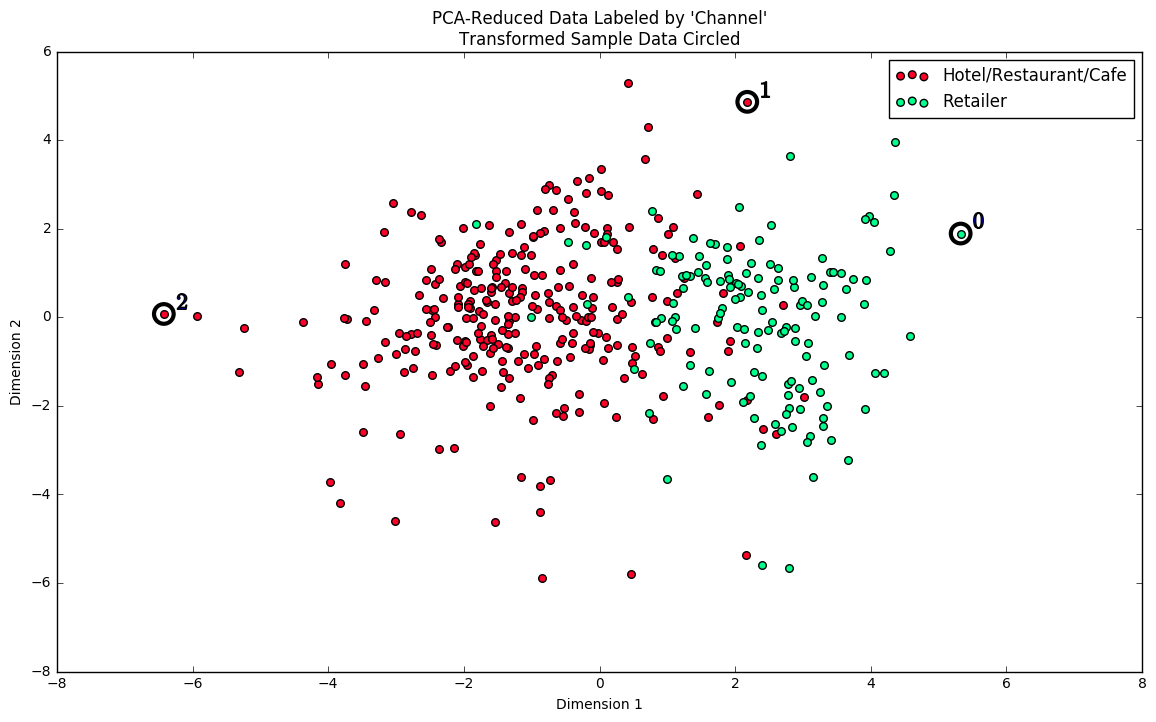

In [33]:
# Display the clustering results based on 'Channel' data
vs.channel_results( reduced_data_good, outliers, pca_samples_good )

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Both KMeans and GMM did an OK, but not stellar, job of labeling the underlying distribution of categories.  We see a lot of overlap and intermixing of data points that are not represented in either the KMeans or GMM scatter plots.  Therefore, just based on subjective comparison of the plots, I'd conclude that GMM was probably a better choice for a clustering algorithm than KMeans, because GMM can represent overlapping clusters.  However, the quantitave evidence produced by the code in the next cell shows that KMeans' accuracy was 89.0% and GMM's was 85.8%.  

The portion of the feature space less than -2 (and tilted a bit left) on dimension 1 could be labeled as purely hotel/restaurant/cafe.  This is consistent with the previous definition of segments since customers in this category spend less on grocery, milk and detergent than customers in the retail category.

The portion of the feature space to the right of dimension 1 = 4 (and tilted a bit to the left) can be labeled as purely a retailer since it corresponds with increased spending on grocery, milk and detergent items, with some deli thrown in.

Yes, these classifications are consistent with my previous definitions of customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Extra: Clustering Algorithm Accuracy

The accuracy of the clustering algorithm was calculated by comparing the cluster identifier for each sample to its "Channel" in the customers.csv file.

The results show that KMeans was 89.0% correct and GMM was 85.8% correct.  This is the same preference provided by the silhouette score (KMeans was higher than GMM).

In [34]:
#
#  grade_clusterer( clustering_algorithm, reduced_data, outliers, pca_samples )
#     Run the specified clustering algorithm on the reduced data and compare the cluster id's it 
#  assigns to each sample to the "Channel" identifier in the original customers.csv data file
#
def grade_clusterer( clustering_algorithm, reduced_data, outliers, pca_samples ):
    _, preds, _, _, _, _ = apply_clusterer( clustering_algorithm, reduced_data, 2, pca_samples )
    full_data            = pd.read_csv("customers.csv")
    channel              = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel              = channel.drop(channel.index[outliers]).reset_index(drop = True)
    cluster_preds        = pd.DataFrame([x+1 for x in preds], columns=['Cluster'])
    results              = pd.concat([channel, cluster_preds], axis=1)
    num_results          = len(results)
    num_correct          = sum(results['Channel'] == results['Cluster'])
    accuracy             = 100.0*num_correct/num_results
    return( num_results, accuracy )

print "%d customers assigned to clusters, %5.2f%% correct" % \
        (grade_clusterer( KMeans, reduced_data_good, outliers, pca_samples_good))
print "%d customers assigned to clusters, %5.2f%% correct" % \
        (grade_clusterer( GMM,    reduced_data_good, outliers, pca_samples_good))

KMeans with 2 clusters finds the following centers in 0.171000 seconds:
[[-1.48832998  0.10435916]
 [ 2.16943014 -0.15211674]]
435 customers assigned to clusters, 88.97% correct
GMM with 2 clusters finds the following centers in 0.181000 seconds:
[[-1.32349592  0.13089129]
 [ 1.65343376 -0.16352153]]
435 customers assigned to clusters, 85.75% correct
